<a href="https://colab.research.google.com/github/yashveersinghsohi/Hands_On_ML_Book_Practice/blob/master/Chapter_10/Chatpter10_Intro_to_ANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Image Classification using Fashion MNIST

In [25]:
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]
fashion_mnist = tf.keras.datasets.fashion_mnist
train_val, test = fashion_mnist.load_data()
X_train_val, y_train_val = train_val
X_train, X_val = X_train_val[:-5000], X_train_val[-5000:]
y_train, y_val = y_train_val[:-5000], y_train_val[-5000:]
X_test, y_test = test
X_train, X_val, X_test = X_train/255.0, X_val/255.0, X_test/255.0
X_train.shape, y_train.shape, X_val.shape, y_val.shape, X_test.shape, y_test.shape

((55000, 28, 28), (55000,), (5000, 28, 28), (5000,), (10000, 28, 28), (10000,))

In [4]:
tf.keras.utils.set_random_seed(0)
model = tf.keras.Sequential()
model.add(tf.keras.layers.Input(shape=[28, 28]))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(300, activation='relu'))
model.add(tf.keras.layers.Dense(100, activation='relu'))
model.add(tf.keras.layers.Dense(10, activation='softmax'))

# model = tf.keras.Sequential([
#   tf.keras.layers.Input(shape=[28, 28]),
#   tf.keras.layers.Flatten(),
#   tf.keras.layers.Dense(300, activation='relu'),
#   tf.keras.layers.Dense(100, activation='relu'),
#   tf.keras.layers.Dense(10, activation='softmax')
# ])
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                    │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 300)                 │         235,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 100)                 │          30,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │           1,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 266,610 (1.02 MB)

 Trainable params: 266,610 (1.02 MB)

 Non-trainable params: 0 (0.00 B)

In [5]:
# # Model EDA
# model.layers
# model.layers[1].name, model.get_layer('dense')
# model.layers[1].activation
# weights, biases = model.layers[1].get_weights()
# weights.shape, biases.shape

In [6]:
model.compile(
  loss = 'sparse_categorical_crossentropy',
  optimizer = tf.keras.optimizers.SGD(learning_rate=0.01), # 'sgd' will keep learning rate fixed - use functions in general - more customization possible
  metrics = ['accuracy']
)

In [7]:
history = model.fit(
  X_train, y_train,
  validation_data = (X_val, y_val),
  epochs = 30
)

Epoch 1/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.6817 - loss: 0.9863 - val_accuracy: 0.8190 - val_loss: 0.5084
Epoch 2/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8262 - loss: 0.4994 - val_accuracy: 0.8366 - val_loss: 0.4533
Epoch 3/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.8439 - loss: 0.4470 - val_accuracy: 0.8460 - val_loss: 0.4291
Epoch 4/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8545 - loss: 0.4176 - val_accuracy: 0.8522 - val_loss: 0.4139
Epoch 5/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8608 - loss: 0.3967 - val_accuracy: 0.8556 - val_loss: 0.4032
Epoch 6/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8673 - loss: 0.3800 - val_accuracy: 0.8578 - val_loss: 0.3947
Epoch 7/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.8704 - loss: 0.3661 - val_accuracy: 0.8608 - val_loss: 0.3862
Epoch 8/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8743 - loss: 0.3540 -

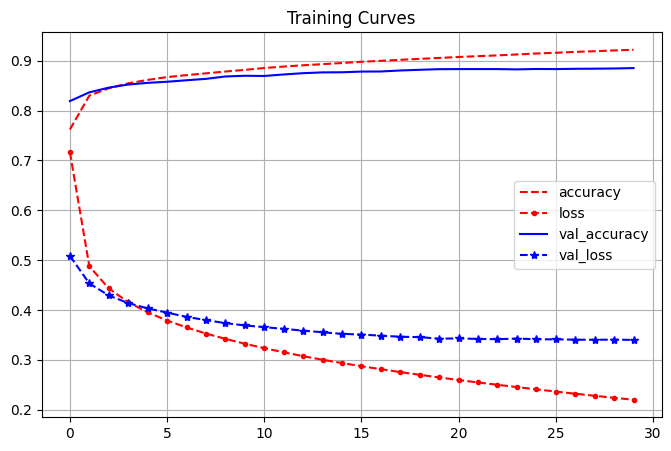

In [17]:
# history.history.keys()
# history.epoch
# history.params

pd.DataFrame(history.history).plot(
  figsize=(8, 5),
  grid = True,
  style = ['r--', 'r--.', 'b-', 'b--*'],
  title='Training Curves'
)
plt.show()

In [18]:
model.evaluate(X_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8797 - loss: 0.3554


[0.3535756468772888, 0.8791999816894531]

In [21]:
probs = model.predict(X_test[:3])
probs.round(2), y_test[:3]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


(array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.01, 0.  , 0.06, 0.  , 0.93],
        [0.  , 0.  , 0.99, 0.  , 0.01, 0.  , 0.  , 0.  , 0.  , 0.  ],
        [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]],
       dtype=float32),
 array([9, 2, 1], dtype=uint8))

In [31]:
np.argmax(probs, axis=1), np.array(class_names)[np.argmax(probs, axis=1)]

(array([9, 2, 1]), array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U11'))